In [1]:
# Initial imports
from dotenv import load_dotenv
import os
import pandas as pd
import numpy as np
from datetime import date
from datetime import timedelta
import plotly.express as px
import plotly.graph_objects as go
import hvplot.pandas
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

# Note: Consolidate API calls in data_service module
import data_service as ds

%matplotlib inline


Bad key "text.kerning_factor" on line 4 in
C:\Users\nospm\anaconda3\envs\pyvizenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
# Load .env enviroment variables
load_dotenv()

True

In [3]:
# Get API keys
coin_api_key = os.getenv('COIN_API_KEY') 
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

In [4]:
# type(coin_api_key)

In [ ]:
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2")

In [5]:
# Common date params
ticker = "GLD"
timeframe = "1D"
start_date = pd.Timestamp("2015-01-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2020-01-01", tz="America/New_York").isoformat()

In [8]:
gld_raw_df = api.get_barset(
    ticker,
    timeframe,
    start=start_date,
    end=end_date).df

In [9]:
gld_raw_df.head()

GLD                                   
                             open    high     low    close    volume
time                                                                
2015-01-02 00:00:00-05:00  112.46  114.80  112.32  114.070   6479924
2015-01-05 00:00:00-05:00  114.78  116.00  114.73  115.850   6243447
2015-01-06 00:00:00-05:00  116.22  117.50  115.80  117.099  10645235
2015-01-07 00:00:00-05:00  116.47  116.88  116.17  116.430   5796027
2015-01-08 00:00:00-05:00  116.45  116.87  115.85  115.950   6085372

In [10]:
# Set number of simulations
num_sims = 100

# Configure a Monte Carlo simulation to forecast 5 years daily returns
MC_GLD = MCSimulation(
    portfolio_data = gld_raw_df,
    num_simulation = num_sims,
    num_trading_days = 252 * 5)

In [11]:
# Run Monte Carlo simulations to forecast one year daily returns
MC_GLD.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.


0         1         2         3         4         5         6   \
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1     1.012647  1.021788  1.009059  0.992288  1.003259  1.001620  0.999310   
2     1.009833  1.044387  1.012833  0.996788  1.004081  1.004965  0.997813   
3     1.007697  1.048255  1.006854  1.004644  1.003445  1.006767  0.993208   
4     1.006371  1.053922  1.005618  1.015897  0.998393  1.013059  0.999367   
5     1.009716  1.047448  0.998330  1.027020  0.992060  0.991299  0.988059   
6     1.008858  1.047344  0.996257  1.022406  0.984849  0.973232  0.981794   
7     1.003923  1.046331  0.985783  1.015788  0.982774  0.973442  0.985127   
8     1.013275  1.036634  0.987821  1.019381  0.975179  0.953834  0.977379   
9     1.020484  1.032480  0.985297  1.012355  0.972623  0.946282  0.971027   
10    1.026365  1.025279  0.987487  1.013030  0.968158  0.961162  0.976190   
11    1.020784  1.031993  0.984321  1.019334  0.969543  0.969403  0.975200   
12    1.025704  1.032351  0.985293  1.027921  0.970879  0.970785  0.973311   
13    1.014987  1.037506  0.984508  1.023786  0.984011  0.960606  0.970294   
14    1.011107  1.032194  0.982678  1.019991  0.989834  0.953438  0.965777   
15    1.010015  1.017273  1.003022  1.025946  0.989385  0.945637  0.971760   
16    1.000653  1.028778  1.006497  1.026304  0.986966  0.953266  0.988008   
17    1.002252  1.032811  1.007995  1.030311  0.990461  0.950329  0.981616   
18    1.000983  1.044567  1.011155  1.024410  0.988018  0.950266  0.985701   
19    0.998541  1.051524  1.014808  1.032636  0.995657  0.958790  0.994099   
20    1.004354  1.042214  1.024745  1.029217  0.994460  0.956938  0.996809   
21    1.015601  1.027168  1.016918  1.031882  0.997781  0.961002  0.997421   
22    1.017314  1.033912  1.012712  1.030163  1.004878  0.955316  0.990137   
23    1.017357  1.025191  1.017096  1.038322  1.008947  0.954289  0.992295   
24    1.023005  1.028217  1.023078  1.039728  1.004145  0.962791  0.987235   
25    1.025216  1.033842  1.022474  1.032649  0.998814  0.968976  0.989827   
26    1.040239  1.035538  1.034050  1.028965  1.009229  0.987877  0.997203   
27    1.051061  1.048627  1.039878  1.033205  1.002782  0.995846  1.001546   
28    1.051879  1.038385  1.040991  1.023825  0.999931  0.999025  0.996152   
29    1.051361  1.037655  1.046814  1.021004  0.999082  0.996533  0.988380   
...        ...       ...       ...       ...       ...       ...       ...   
1231  1.503378  1.790687  1.292636  1.154707  1.443512  1.247091  1.897366   
1232  1.509427  1.803616  1.282854  1.150420  1.441240  1.247848  1.895586   
1233  1.529442  1.790798  1.286207  1.154890  1.428909  1.226944  1.895262   
1234  1.545859  1.767198  1.292432  1.155155  1.436260  1.237296  1.899566   
1235  1.552941  1.767418  1.298927  1.170288  1.452865  1.234265  1.904657   
1236  1.576406  1.767260  1.277192  1.153831  1.450631  1.234966  1.907721   
1237  1.573267  1.752746  1.292649  1.148285  1.471333  1.225178  1.927513   
1238  1.582241  1.765586  1.296302  1.149131  1.469788  1.231597  1.942005   
1239  1.571518  1.766410  1.293891  1.169464  1.468298  1.241420  1.956052   
1240  1.602559  1.759257  1.282082  1.183137  1.450366  1.262551  1.954892   
1241  1.614893  1.779413  1.296272  1.185005  1.452562  1.268064  1.965329   
1242  1.617904  1.772203  1.289603  1.184342  1.455196  1.261409  2.003323   
1243  1.632192  1.774971  1.286384  1.185491  1.456516  1.254274  1.997213   
1244  1.621828  1.768680  1.299512  1.185816  1.465785  1.247507  2.009556   
1245  1.638190  1.779161  1.303770  1.175831  1.491901  1.238962  2.008163   
1246  1.634104  1.796999  1.318134  1.168687  1.463881  1.221460  2.023997   
1247  1.655296  1.817534  1.326938  1.178348  1.479830  1.241645  2.037465   
1248  1.666596  1.805370  1.312847  1.177709  1.489535  1.240338  2.032385   
1249  1.687257  1.801340  1.327722  1.180865  1.498553  1.248577  2.026684   
1250  1.697471  1.813065  1.326444

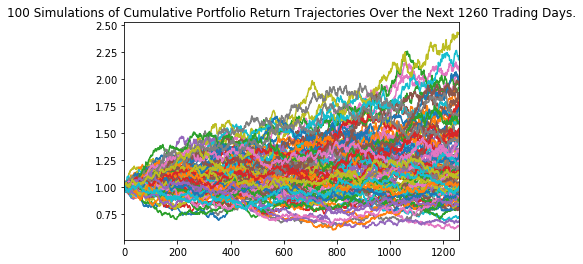

In [13]:
# Plot simulation outcomes
line_plot = MC_GLD.plot_simulation()

In [15]:
# need to format to multi-level column
btc_df = ds.get_crypto_OHLCV(coin_api_key, 'BTC', '2020-12-01', '2021-01-01', '1DAY')

btc_df.head()

date      open      high      low     close        volume
0  2020-12-02  19713.94  19947.50  18100.0  18782.97  59885.116770
1  2020-12-03  18778.18  19350.00  18334.0  19225.63  31261.012224
2  2020-12-04  19222.45  19625.64  18851.9  19448.40  27569.917162
3  2020-12-05  19446.43  19552.50  18561.6  18658.10  30245.035975
4  2020-12-06  18658.09  19193.07  18500.0  19153.00  12401.987320

In [26]:
# df=pd.DataFrame({'a':[1,2,3],'b':[4,5,6]})
# columns=[('c','a'),('c','b')]
# df.columns=pd.MultiIndex.from_tuples(columns)

# df = pd.DataFrame({'BTC': [btc_df['date'], btc_df['open']]})
btc_df.columns=pd.MultiIndex.from_tuples([('BTC','date'),('BTC','open'),('BTC','high'),('BTC','low'),('BTC','close'),('BTC','volume')])



In [27]:
btc_df.index = btc_df['BTC']['date']
btc_df.drop(columns=('BTC','date'), inplace=True)

In [28]:
btc_df.head()

BTC                                           
                open      high      low     close        volume
date                                                           
2020-12-02  19713.94  19947.50  18100.0  18782.97  59885.116770
2020-12-03  18778.18  19350.00  18334.0  19225.63  31261.012224
2020-12-04  19222.45  19625.64  18851.9  19448.40  27569.917162
2020-12-05  19446.43  19552.50  18561.6  18658.10  30245.035975
2020-12-06  18658.09  19193.07  18500.0  19153.00  12401.987320

In [29]:
# Set number of simulations
num_sims = 500

# Configure a Monte Carlo simulation to forecast one year daily returns
MC_BTC = MCSimulation(
    portfolio_data = btc_df,
    num_simulation = num_sims,
    num_trading_days = 252)

In [30]:
MC_GLD.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.


0         1         2         3         4         5         6   \
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1     1.012776  0.996937  0.995482  0.994769  1.006534  0.998023  0.996685   
2     1.018278  1.003517  0.997412  1.004285  1.008611  0.988864  1.003726   
3     1.023539  1.011253  0.998194  0.987374  0.998324  0.987115  0.988589   
4     1.021818  1.019861  1.002212  0.984121  0.996337  0.988317  1.004764   
5     1.027216  1.014958  0.991934  0.986115  0.995728  0.978916  1.006482   
6     1.017330  1.017768  0.998893  0.988268  1.001822  0.966192  1.001110   
7     1.018532  1.032989  1.001719  0.979565  1.003961  0.973366  1.010693   
8     1.019804  1.041034  1.007938  0.976500  1.018491  0.974896  1.018169   
9     1.021672  1.048513  1.007606  0.981412  1.009199  0.969544  1.016403   
10    1.022297  1.046906  1.007867  0.982065  1.026067  0.958964  1.006715   
11    1.035692  1.052392  1.017316  0.970889  1.015688  0.956059  1.006648   
12    1.023215  1.054633  1.009374  0.974266  1.013954  0.947153  1.012129   
13    1.019310  1.048491  1.012323  0.977409  1.013298  0.952866  1.015469   
14    1.018986  1.042389  1.010017  0.972869  1.010951  0.945301  1.015292   
15    1.020711  1.051480  1.009053  0.969354  1.001848  0.951455  1.022832   
16    1.026191  1.040562  1.013245  0.963803  1.005277  0.943698  1.025144   
17    1.022273  1.026051  1.003271  0.956029  1.007126  0.964200  1.022938   
18    1.025850  1.026856  1.015571  0.940255  1.000428  0.969787  1.018869   
19    1.034297  1.029713  1.009996  0.940928  1.009146  0.959911  1.013458   
20    1.019225  1.029063  1.019277  0.935792  1.006999  0.956612  1.020883   
21    1.013643  1.036735  1.021892  0.928308  1.006368  0.941635  1.036542   
22    1.002174  1.047769  1.013476  0.930896  0.999273  0.939539  1.035273   
23    1.004226  1.049752  1.021724  0.926613  1.006520  0.930693  1.042636   
24    1.004176  1.035680  1.022678  0.926606  0.989012  0.925925  1.031699   
25    1.002997  1.035624  1.024826  0.917641  0.992034  0.944438  1.043135   
26    1.003303  1.050015  1.035759  0.923408  1.007812  0.956017  1.040599   
27    1.020940  1.035246  1.033518  0.923310  1.014002  0.957917  1.043457   
28    1.028622  1.046548  1.023426  0.915173  1.011460  0.965001  1.057992   
29    1.032153  1.032654  1.032857  0.912132  0.991917  0.973768  1.051721   
...        ...       ...       ...       ...       ...       ...       ...   
1231  1.987654  1.031816  0.959492  1.138256  1.024855  0.867968  1.234478   
1232  1.995521  1.030411  0.961519  1.134047  1.021783  0.865762  1.238703   
1233  1.992202  1.023256  0.961760  1.135632  1.027399  0.859760  1.240113   
1234  1.988185  1.030905  0.951196  1.144646  1.022411  0.864101  1.228331   
1235  1.977100  1.030244  0.951126  1.140414  1.016348  0.886160  1.225362   
1236  2.005279  1.028675  0.948969  1.118717  1.015425  0.883719  1.239540   
1237  2.004876  1.036578  0.941328  1.129608  1.010930  0.886336  1.233430   
1238  1.986366  1.020619  0.940174  1.139305  1.016274  0.882475  1.235668   
1239  1.983685  1.025791  0.947237  1.124077  1.015562  0.880190  1.253099   
1240  2.012475  1.021701  0.945158  1.111930  1.020408  0.881774  1.259032   
1241  2.017088  1.023022  0.947279  1.110104  1.036448  0.874088  1.247671   
1242  1.994141  1.009465  0.945918  1.107513  1.029893  0.872283  1.247444   
1243  1.982737  1.016762  0.964869  1.098318  1.015208  0.876053  1.242145   
1244  1.996862  1.021641  0.957061  1.093730  1.015804  0.882910  1.249087   
1245  1.983607  1.023130  0.964526  1.102286  1.015244  0.875086  1.249991   
1246  2.001013  1.009136  0.960540  1.107002  1.005113  0.876835  1.260781   
1247  2.001079  1.011872  0.938045  1.093151  1.010751  0.877286  1.254382   
1248  2.017909  1.009145  0.948758  1.090075  0.999435  0.881091  1.248632   
1249  2.027316  1.019260  0.964509  1.090539  1.011482  0.890474  1.242675   
1250  2.010787  1.019266  0.963446